## Lead Score Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. |
On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. 
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. 
Moreover, the company also gets leads through past referrals. 
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.
Through this process, some of the leads get converted while most do not. 
The typical lead conversion rate at X education is around 30%. 



Now, although X Education gets a lot of leads, its lead conversion rate is very poor. 
For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goal


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



## Dataset

Provided with a leads dataset from the past with around 9000 data points.
This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.
The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

## Goals of the case study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### EXPLORATORY DATA ANALYSIS

### Step 1:  Importing Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


### Data Sourcing

In [2]:
# Importing the data set
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# dimensions of the dataframe
leads_data.shape

(9240, 37)

In [4]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking the data structure
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 3: Data Preparation

##### Data Cleaning 

In [6]:
# Many of the columns have 'Select' values which is  NAN value in real.
#Converting 'Select' values to NaN.
leads_data = leads_data.replace('Select', np.nan)
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


####  Dropping duplicate entries

In [7]:
leads_data.shape

(9240, 37)

In [8]:
leads_data.drop_duplicates(subset='Lead Number', keep='first', inplace=True)

In [9]:
leads_data.shape

(9240, 37)

#### Checking for NUll values

In [10]:
#Getting the percentage of null values in each column
leads_data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Dropping Columns with null values more than 70%

In [11]:
# dropping all columns with more than 70% null values
leads_data = leads_data.drop(leads_data.loc[
                        :,list(round(100*(leads_data.isnull().sum()/len(leads_data.index))
                                     , 2)>70)].columns, 1)

### Checking categorical columns values for Missing Value Treatment

In [12]:
#Lead Quality
leads_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [13]:
#Tags
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [14]:
#City
leads_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
#Country
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
China                      2
Uganda                     2
Belgium                    2
Bangladesh                 2
Ghana                      2
Philippines                2
Italy                      2
Netherlands                2
Russia                     1
Malaysia                   1
Sri Lanka                  1
Switzerland                1
Kenya                      1
Liberia                    1
Vietnam       

In [16]:
#Specialization
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
#Current Occupation
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
#What matters most to you in choosing a course
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### Dropping the columns Asymmetrique Activity Index','Asymmetrique Profile Index',
##### 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'   
##### Insignificant Columns

In [19]:
#Asymmetrique Activity Index
leads_data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [20]:
#Asymmetrique Profile Index
leads_data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [21]:
#Columns could be dropped
leads_data=leads_data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                            'Asymmetrique Profile Score'],axis=1)

### Missing Value Treatment By Imputing values

In [22]:
#Imputing the NANs
leads_data['Lead Quality']=leads_data['Lead Quality'].replace(np.nan,'Not Sure')
leads_data['Tags']=leads_data['Tags'].replace(np.nan,'Others')
leads_data['City']=leads_data['City'].replace(np.nan,'Other Cities')

leads_data['Country']=leads_data['Country'].replace(np.nan,'unknown')
leads_data['Specialization']=leads_data['Specialization'].replace(np.nan,'Others')
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan,'Other')
leads_data['What matters most to you in choosing a course']=leads_data['What matters most to you in choosing a course'].replace(np.nan,'Other')


In [23]:
leads_data.isnull().mean()*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [24]:
leads_data.dropna(inplace=True)

In [25]:
leads_data.isnull().any().sum()

0

### DATA VISUALIZATION using SEGMENTED UNIVARIANT ANALYSIS

In [26]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [27]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


### Checking Leads Converted Rate

In [28]:
#Finding the percentage of leads converted
Converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1]), <a list of 2 Text xticklabel objects>)

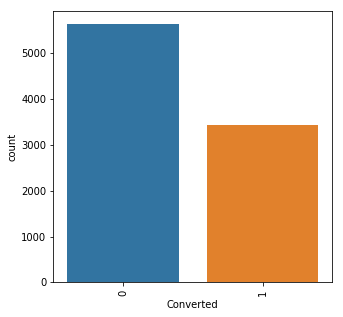

In [29]:
#Finding the contribution of lead converted
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x = "Converted", data = leads_data)
xticks(rotation = 90)

### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

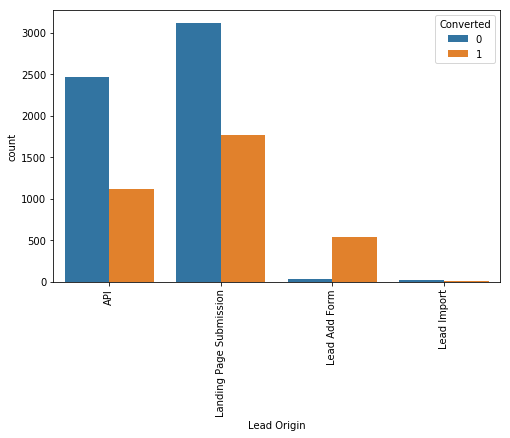

In [30]:
#Finding the contribution of each type of lead origins
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Inference
#### To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

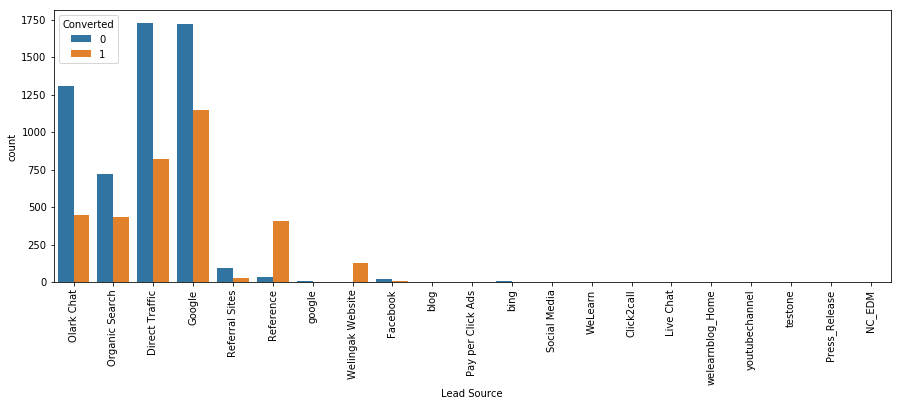

In [31]:
#Analysing the lead source 
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Data Cleaned for  Lead Source Values 

###### Google and google are same
###### grouping all small contributers into others

In [32]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google') # Google and google are same
# grouping all small contributers into others
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

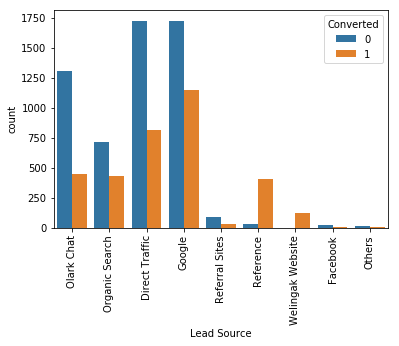

In [33]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Inference
#### Google and Direct traffic generates higher number of leads.
#### Conversion Rate of reference leads and leads through welingak website is high.

#### Recomended to generate more leads through Reference and Wellingak Website 
#### Focus on improving lead conversion through olark chat, organic search, direct traffic, and google 


### Do not call and Do not email

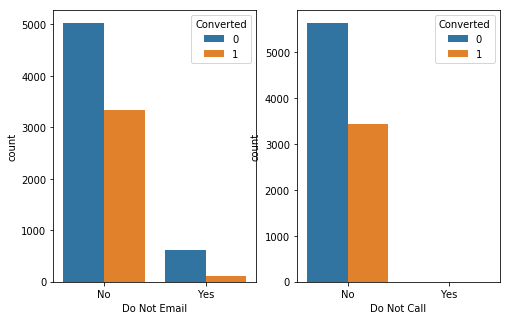

In [34]:
# Checking do not call and do not email
fig, axs = plt.subplots(1,2,figsize = (8,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data, ax = axs[1])

### Outlier Treatment

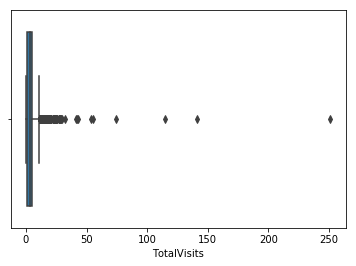

In [35]:
# Checking TotalVisits
sns.boxplot(leads_data['TotalVisits'])

In [36]:
# treating the outliers by capping them to 95%
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

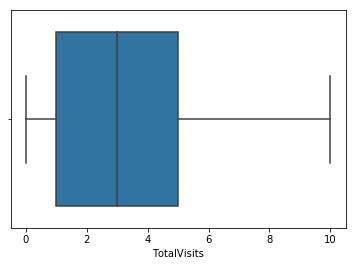

In [37]:
sns.boxplot(leads_data['TotalVisits'])

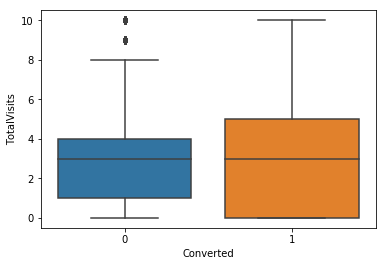

In [38]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)

### Inference
#### Median for converted and not converted leads are the same.
#### No significant inferences drawn from Total visits information

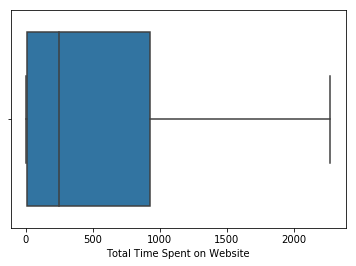

In [39]:
# Checking Total Time Spent on Website
sns.boxplot(leads_data['Total Time Spent on Website'])

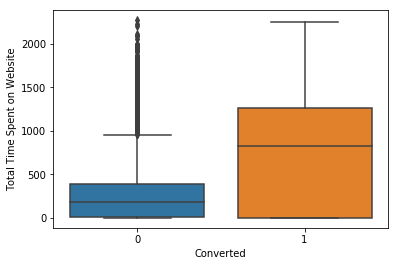

In [40]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)

### Inference

#### The median time spend on website for converted leads is more than that of not converted.
####  Website should be made more engaging to make leads spend more time.

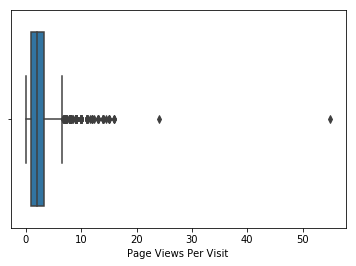

In [41]:
#pages per visit
sns.boxplot(leads_data['Page Views Per Visit'])

In [42]:
# treating outliers with 95% cap
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

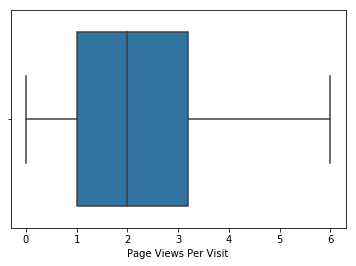

In [43]:
sns.boxplot(leads_data['Page Views Per Visit'])

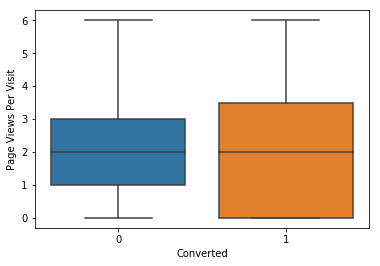

In [44]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)

### Inference
#### Median for converted and unconverted leads is almost the same.
#### No specific inference can be drawn from this column

#### Checking for Significance of  Columns

#### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

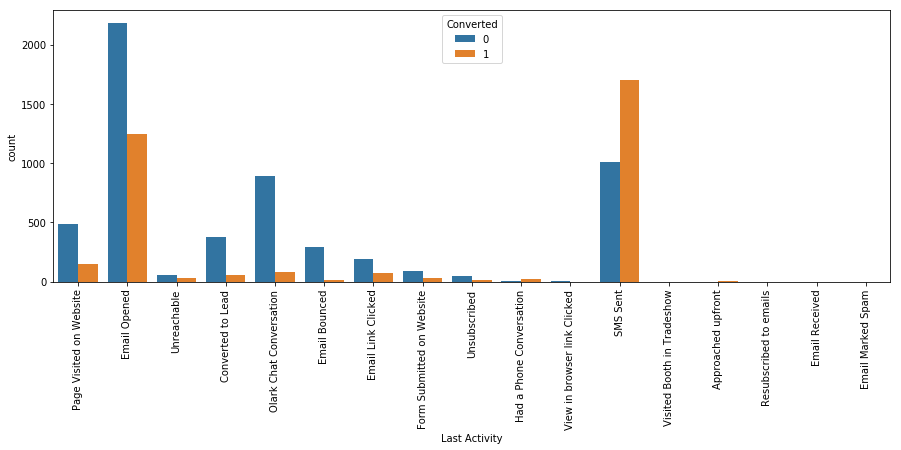

In [45]:
# Last Activity
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = leads_data)
xticks(rotation = 90)

#### all small contributors are classified into other activities

In [46]:
# all small contributors are classified into other activities
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

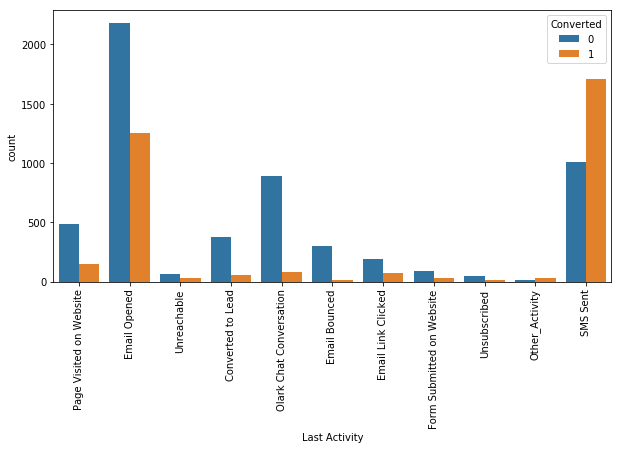

In [47]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Inference
#### Most of the lead have their Email opened as their last activity.
#### Conversion rate for leads with last activity as SMS Sent is higher than all other activities

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

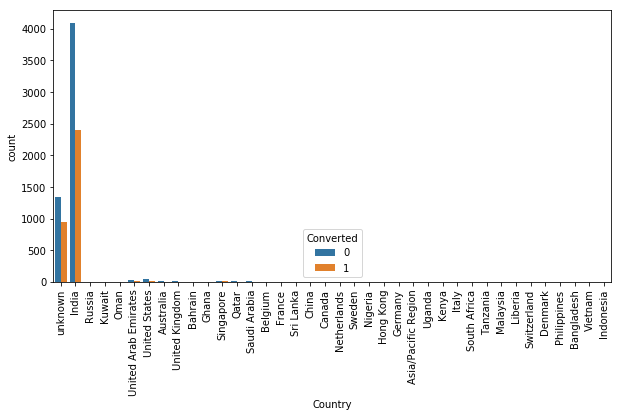

In [48]:
# Country
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Country", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Inference
#### The data collection was mainly done in India
#### No specific inference drawn 

##### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

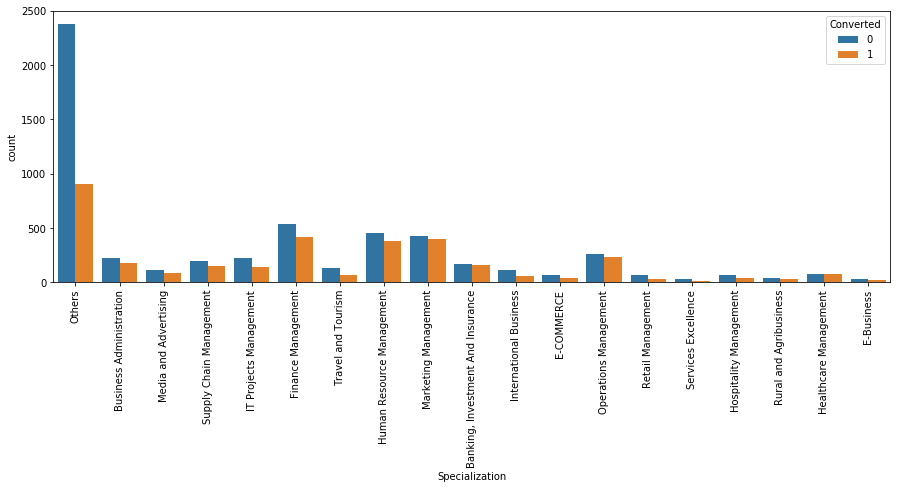

In [49]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

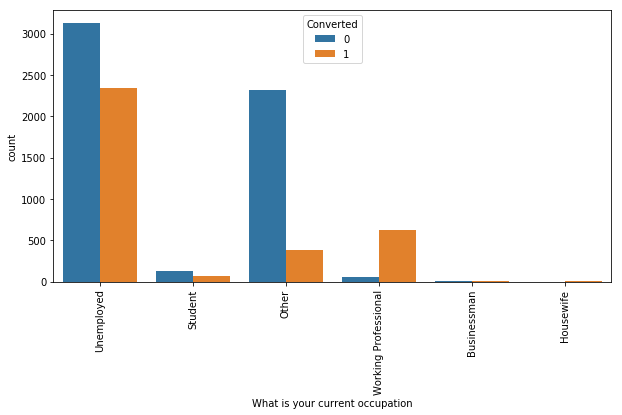

In [50]:
# Occupation
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
xticks(rotation = 90)

### Inference
#### Working Professionals going for the course have high chances of joining it.
#### Unemployed leads are the most in numbers and has a good conversion rate compared to others.
#### Focus on unemployed category

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

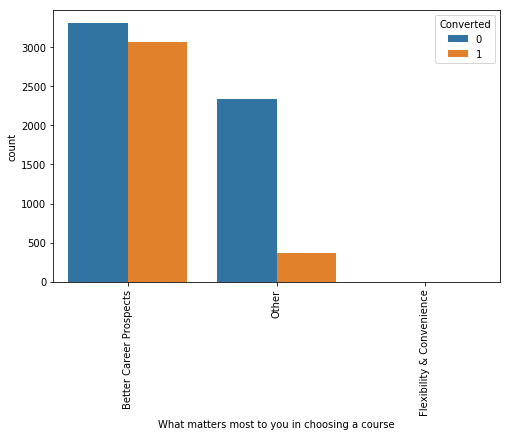

In [51]:
# What matters most to you in choosing a course
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

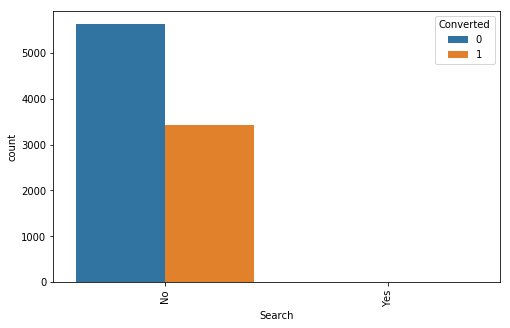

In [52]:
# Search
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Search", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

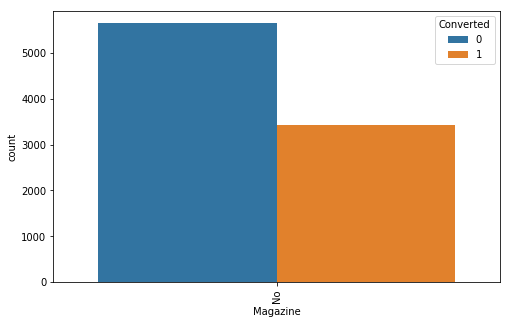

In [53]:
# Magazine
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Magazine", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

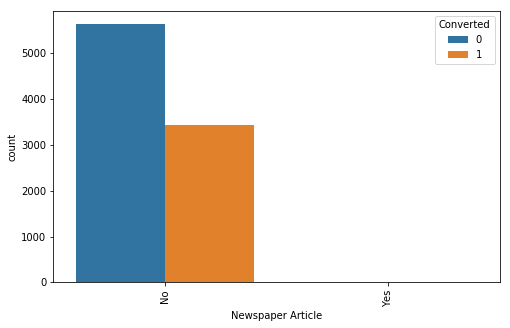

In [54]:
# Newspaper Article
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

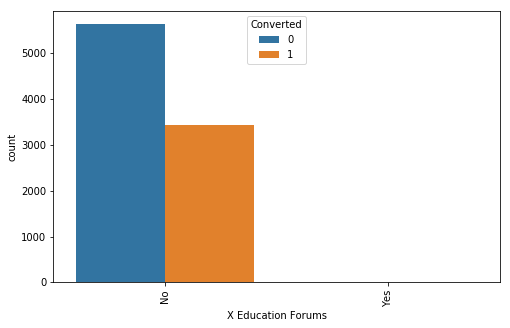

In [55]:
# X Education Forums
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

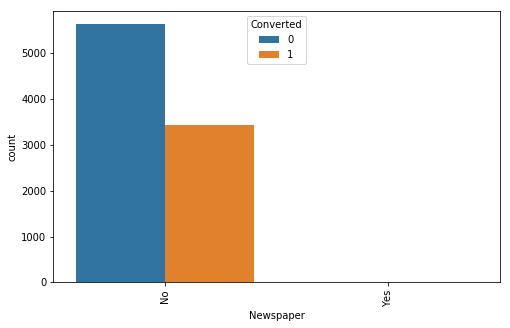

In [56]:
#Newspaper
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

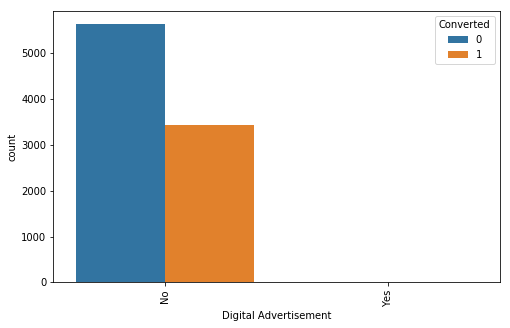

In [57]:
# Digital Advertisement
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

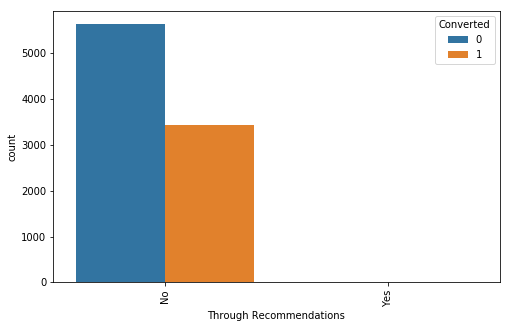

In [58]:
#Through Recommendations
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

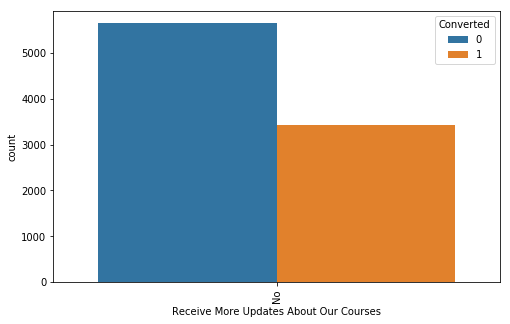

In [59]:
#Receive More Updates About Our Courses
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

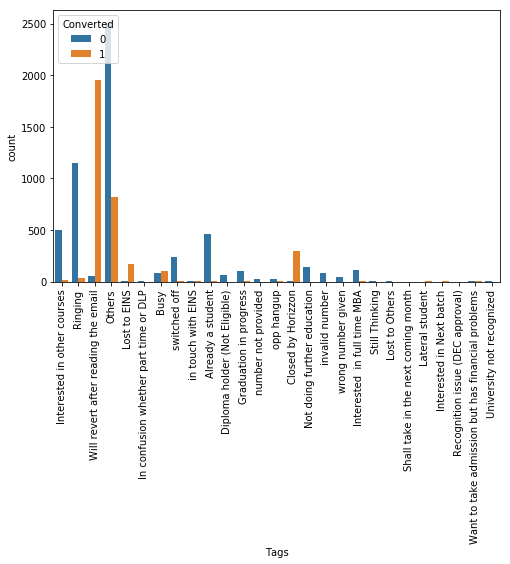

In [60]:
#Tags
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

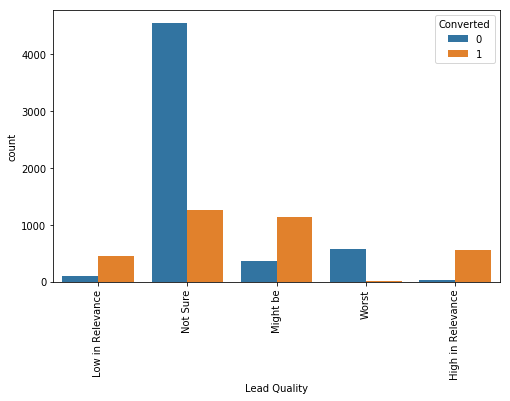

In [61]:
#Lead Quality
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

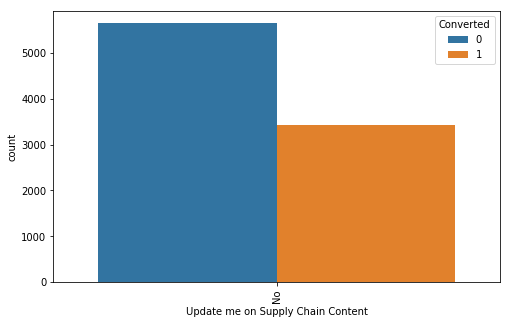

In [62]:
#Update me on Supply Chain Content
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

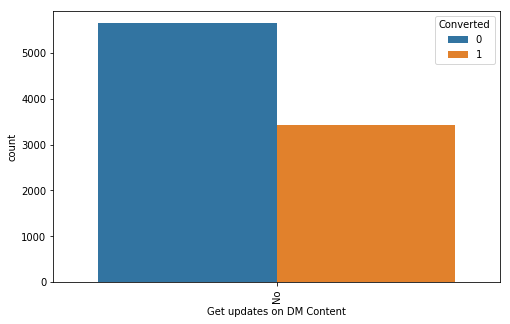

In [63]:
#Get updates on DM Content
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

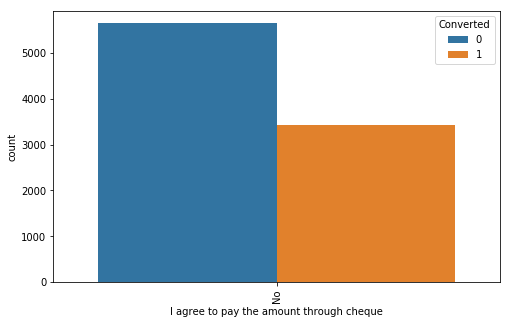

In [64]:
#I agree to pay the amount through cheque
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

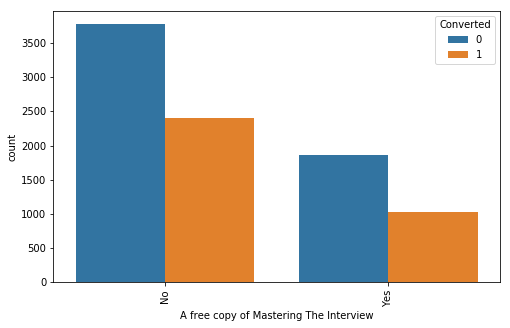

In [65]:
#A free copy of Mastering The Interview
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

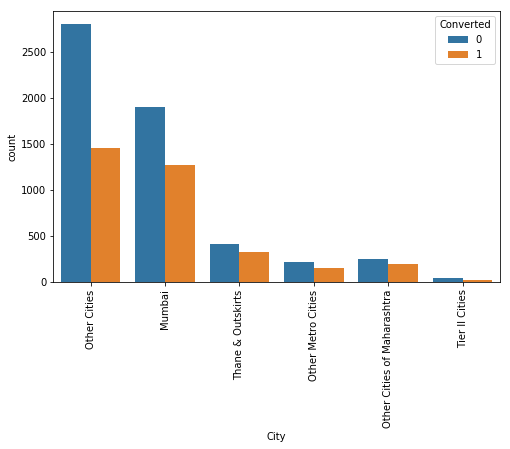

In [66]:
#City
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "City", hue = "Converted", data = leads_data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

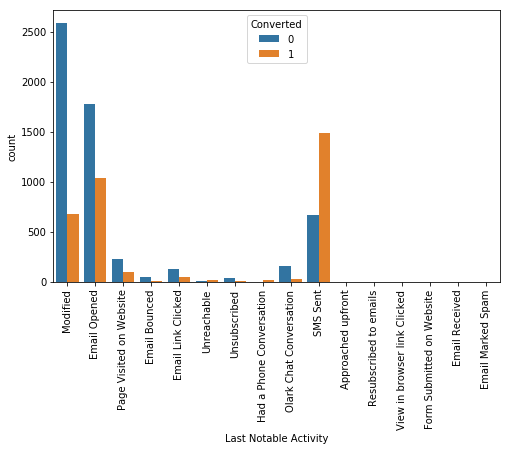

In [67]:
#Last Notable Activity
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
xticks(rotation = 90)

#### No specific inference drawn from above columns 

In [68]:
leads_data = leads_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [69]:
leads_data.shape

(9074, 16)

In [70]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null object
Do Not Call                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null obje

## BIVARIANT ANALYSIS

### Only three numerical variables
TotalVisits  ,Total Time Spent on Website, Page Views Per Visit                     .

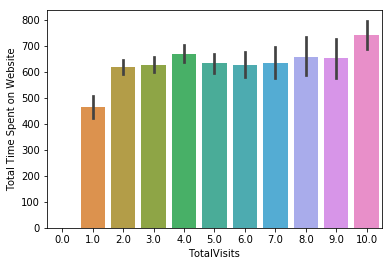

In [71]:
sns.barplot(x='TotalVisits',y='Total Time Spent on Website', data=leads_data)

In [72]:
#Keeping a copy of the cleaned data befor dummy variable creation

leads_orginal=leads_data.copy()

#### Converting some binary variables (Yes/No) to 0/1

In [73]:
# List of variables to map

varlist =  ['Do Not Call', 'Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads_data list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [74]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [75]:
dummies = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
leads_data = pd.concat([leads_data, dummies], axis=1)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not S

In [77]:
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 
                              'Specialization','What is your current occupation','Tags',
                              'Lead Quality','City','Last Notable Activity'], axis = 1)

In [78]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f

In [79]:
leads_data.shape

(9074, 101)

In [80]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Columns: 101 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(4), object(1), uint8(94)
memory usage: 1.7+ MB


## MODEL BUILDING

#### TEST-TRAIN SPLIT

In [81]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)

In [82]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [83]:
# Putting response variable to y
y = leads_data['Converted']

In [84]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### FEATURE SCALING OF THE DATA SET

In [86]:
#Importing Standard Scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\SHARIE R NATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SHARIE R NATH\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,

#### Assessing the data with Statsmodel


In [87]:
import statsmodels.api as sm

In [88]:
# Logistic regression model
logmodel1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           99
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -951.65
Date:                Mon, 26 Aug 2019   Deviance:                       1903.3
Time:                        22:26:03   Pearson chi2:                 1.16e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     18.2094   2.16e+05   8.43e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                              -1.5662      0.384     -4.074      0.000      -2.320      -0.813
Do Not Call                                               22.3218   1.37e+05      0.000      1.000   -2.69e+05    2.69e+05
TotalVisits                                                0.3106      0.102      3.051      0.002       0.111       0.510
Total Time Spent on Website                                1.1839      0.074     16.091      0.000       1.040       1.328
Page Views Per Visit                                      -0.4083      0.116     -3.532      0.000      -0.635      -0.182
Lead Origin_Landing Page Submission                       -0.5099      0.272     -1.875      0.061      -1.043       0.023
Lead Origin_Lead Add Form                                 -2.2479      1.648     -1.364      0.173      -5.479       0.983
Lead Origin_Lead Import                                   25.4418   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                     -25.2113   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                         0.2740      0.180      1.523      0.128      -0.079       0.627
Lead Source_Olark Chat                                     1.0454      0.276      3.782      0.000       0.504       1.587
Lead Source_Organic Search                                 0.0679      0.244      0.278      0.781      -0.410       0.546
Lead Source_Others                                         1.3324      0.987      1.349      0.177      -0.603       3.268
Lead Source_Reference                                      2.9192      1.710      1.707      0.088      -0.433       6.272
Lead Source_Referral Sites                                 0.3851      0.557      0.692      0.489      -0.706       1.476
Lead Source_Welingak Website                               5.9429      1.810      3.284      0.001       2.396       9.490
Last Activity_Email Bounced                                0.3472      0.920      0.377      0.706      -1.456       2.150
Last Activity_Email Link Clicked                           1.3437      0.761      1.767      0.077      -0.147       2.834
Last Activity_Email Opened                                 0.6243      0.469      1.332      0.183      -0.295       1.543
Last Activity_Form Submitted on Website                    0.2040      0.729      0.280      0.780      -1.225       1.633
Last Activity_Olark Chat Conversation                     -0.2084      0.473     -0.440      0.660      -1.136       0.719
Last Activity_Other_Activity                               1.3915      1.429      0.974

#### Feature Selection Using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 61),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 81),
 ('Lead Source_Others', False, 27),
 ('Lead Source_Reference', False, 79),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 66),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 38),
 ('Last Activity_Form Submitted on Website', False, 64),
 ('Last Activity_Olark Chat Conversation', False, 18),
 ('Last Activity_Other_Activity', False, 21),
 ('Last Activity_Page Visited on Website', False, 76),
 ('Last Activity_SMS Sen

In [92]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Other',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

#### Running first Model with RFE selected variables

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logmodel2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1184.9
Date:                Mon, 26 Aug 2019   Deviance:                       2369.9
Time:                        22:26:08   Pearson chi2:                 1.35e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6748      0.194    -13.800      0.000      -3.055      -2.295
Do Not Email                                -1.4629      0.258     -5.661      0.000      -1.969      -0.956
Lead Source_Welingak Website                 2.6523      0.744      3.565      0.000       1.194       4.111
Last Activity_SMS Sent                       2.3311      0.125     18.717      0.000       2.087       2.575
What is your current occupation_Other       -2.5719      0.148    -17.406      0.000      -2.862      -2.282
Tags_Busy                                    1.7112      0.290      5.902      0.000       1.143       2.280
Tags_Closed by Horizzon                      8.3441      0.741     11.266      0.000       6.892       9.796
Tags_Lost to EINS                            9.3426      0.789     11.845      0.000       7.797      10.888
Tags_Others                                  3.1525      0.222     14.203      0.000       2.718       3.588
Tags_Ringing                                -2.2844      0.305     -7.488      0.000      -2.882      -1.686
Tags_Will revert after reading the email     6.2931      0.260     24.203      0.000       5.783       6.803
Tags_invalid number                        -22.6040   1.48e+04     -0.002      0.999   -2.91e+04     2.9e+04
Tags_switched off                           -2.3069      0.553     -4.173      0.000      -3.390      -1.223
Tags_wrong number given                    -22.5907   2.05e+04     -0.001      0.999   -4.01e+04    4.01e+04
Lead Quality_Worst                          -2.4145      0.824     -2.930      0.003      -4.030      -0.799
Last Notable Activity_Modified              -1.5776      0.130    -12.143      0.000      -1.832      -1.323
============================================================================================================
"""

In [94]:
# Dropping column with p value > .05
col = col.drop('Tags_invalid number',1)

#### Running the second model

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logmodel2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.8
Date:                Mon, 26 Aug 2019   Deviance:                       2385.5
Time:                        22:26:08   Pearson chi2:                 1.31e+04
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8809      0.195    -14.756      0.000      -3.264      -2.498
Do Not Email                                -1.4567      0.257     -5.664      0.000      -1.961      -0.953
Lead Source_Welingak Website                 2.6544      0.743      3.571      0.000       1.198       4.111
Last Activity_SMS Sent                       2.2831      0.123     18.568      0.000       2.042       2.524
What is your current occupation_Other       -2.5585      0.147    -17.423      0.000      -2.846      -2.271
Tags_Busy                                    1.9436      0.288      6.760      0.000       1.380       2.507
Tags_Closed by Horizzon                      8.5255      0.742     11.496      0.000       7.072       9.979
Tags_Lost to EINS                            9.5118      0.789     12.055      0.000       7.965      11.058
Tags_Others                                  3.3594      0.223     15.082      0.000       2.923       3.796
Tags_Ringing                                -2.0386      0.302     -6.748      0.000      -2.631      -1.446
Tags_Will revert after reading the email     6.4891      0.262     24.806      0.000       5.976       7.002
Tags_switched off                           -2.0593      0.551     -3.737      0.000      -3.139      -0.979
Tags_wrong number given                    -21.3507   1.25e+04     -0.002      0.999   -2.44e+04    2.44e+04
Lead Quality_Worst                          -2.4012      0.826     -2.907      0.004      -4.020      -0.782
Last Notable Activity_Modified              -1.5469      0.130    -11.938      0.000      -1.801      -1.293
============================================================================================================
"""

In [96]:
# Dropping column with p value > .05
col = col.drop('Tags_wrong number given',1)

#### Running the third model

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logmodel3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.3
Date:                Mon, 26 Aug 2019   Deviance:                       2392.6
Time:                        22:26:08   Pearson chi2:                 1.30e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9777      0.196    -15.216      0.000      -3.361      -2.594
Do Not Email                                -1.4613      0.256     -5.701      0.000      -1.964      -0.959
Lead Source_Welingak Website                 2.6566      0.743      3.575      0.000       1.200       4.113
Last Activity_SMS Sent                       2.2639      0.122     18.486      0.000       2.024       2.504
What is your current occupation_Other       -2.5533      0.147    -17.426      0.000      -2.841      -2.266
Tags_Busy                                    2.0518      0.286      7.167      0.000       1.491       2.613
Tags_Closed by Horizzon                      8.6151      0.742     11.612      0.000       7.161      10.069
Tags_Lost to EINS                            9.5928      0.789     12.155      0.000       8.046      11.140
Tags_Others                                  3.4578      0.223     15.518      0.000       3.021       3.895
Tags_Ringing                                -1.9258      0.301     -6.403      0.000      -2.515      -1.336
Tags_Will revert after reading the email     6.5841      0.262     25.131      0.000       6.071       7.098
Tags_switched off                           -1.9454      0.550     -3.536      0.000      -3.024      -0.867
Lead Quality_Worst                          -2.3555      0.830     -2.837      0.005      -3.983      -0.728
Last Notable Activity_Modified              -1.5383      0.129    -11.882      0.000      -1.792      -1.285
============================================================================================================
"""

#### Checking VIF

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [100]:
checkVIF(X_train_sm)

,Features,VIF
0,const,10.07
8,Tags_Others,4.88
4,What is your current occupation_Other,3.30
10,Tags_Will revert after reading the email,2.51
9,Tags_Ringing,1.90
12,Lead Quality_Worst,1.41
6,Tags_Closed by Horizzon,1.24
11,Tags_switched off,1.19
13,Last Notable Activity_Modified,1.19
3,Last Activity_SMS Sent,1.17


In [101]:
# Dropping column with vif > 2
col = col.drop('Tags_Others',1)

##### Running the fourth model

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logmodel4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1366.8
Date:                Mon, 26 Aug 2019   Deviance:                       2733.6
Time:                        22:26:08   Pearson chi2:                 1.37e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9571      0.089    -10.708      0.000      -1.132      -0.782
Do Not Email                                -1.3559      0.249     -5.441      0.000      -1.844      -0.867
Lead Source_Welingak Website                 4.1527      0.742      5.598      0.000       2.699       5.607
Last Activity_SMS Sent                       2.2261      0.111     20.140      0.000       2.009       2.443
What is your current occupation_Other       -1.0550      0.113     -9.301      0.000      -1.277      -0.833
Tags_Busy                                    0.0951      0.235      0.404      0.686      -0.366       0.556
Tags_Closed by Horizzon                      6.8452      0.723      9.473      0.000       5.429       8.261
Tags_Lost to EINS                            7.4833      0.844      8.870      0.000       5.830       9.137
Tags_Ringing                                -3.9083      0.253    -15.469      0.000      -4.404      -3.413
Tags_Will revert after reading the email     4.6510      0.198     23.530      0.000       4.264       5.038
Tags_switched off                           -3.9303      0.525     -7.480      0.000      -4.960      -2.901
Lead Quality_Worst                          -3.7399      0.614     -6.093      0.000      -4.943      -2.537
Last Notable Activity_Modified              -1.8047      0.122    -14.756      0.000      -2.044      -1.565
============================================================================================================
"""

In [103]:
# Dropping column with p > .05
col = col.drop('Tags_Busy',1)

#### Running the fifth model

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logmodel5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1366.9
Date:                Mon, 26 Aug 2019   Deviance:                       2733.8
Time:                        22:26:08   Pearson chi2:                 1.39e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9479      0.086    -10.975      0.000      -1.117      -0.779
Do Not Email                                -1.3594      0.249     -5.460      0.000      -1.847      -0.871
Lead Source_Welingak Website                 4.1428      0.741      5.587      0.000       2.689       5.596
Last Activity_SMS Sent                       2.2340      0.109     20.523      0.000       2.021       2.447
What is your current occupation_Other       -1.0670      0.110     -9.743      0.000      -1.282      -0.852
Tags_Closed by Horizzon                      6.8382      0.722      9.466      0.000       5.422       8.254
Tags_Lost to EINS                            7.4852      0.844      8.869      0.000       5.831       9.139
Tags_Ringing                                -3.9241      0.250    -15.714      0.000      -4.413      -3.435
Tags_Will revert after reading the email     4.6427      0.197     23.616      0.000       4.257       5.028
Tags_switched off                           -3.9463      0.524     -7.531      0.000      -4.973      -2.919
Lead Quality_Worst                          -3.7500      0.613     -6.115      0.000      -4.952      -2.548
Last Notable Activity_Modified              -1.8073      0.122    -14.800      0.000      -2.047      -1.568
============================================================================================================
"""

In [105]:
checkVIF(X_train_sm)

,Features,VIF
0,const,6.05
8,Tags_Will revert after reading the email,1.70
4,What is your current occupation_Other,1.66
7,Tags_Ringing,1.42
10,Lead Quality_Worst,1.23
11,Last Notable Activity_Modified,1.15
3,Last Activity_SMS Sent,1.14
5,Tags_Closed by Horizzon,1.13
9,Tags_switched off,1.09
2,Lead Source_Welingak Website,1.05


### All VIF and p values are acceptable

###### So we need not drop any more variables 
###### We can proceed with making predictions using this model only

#### Getting Predictions on  Training Model

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.117648
1012    0.090522
9226    0.011598
4750    0.554561
7987    0.999056
1281    0.997345
2880    0.117648
4971    0.783485
7536    0.975750
1248    0.011598
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11764834, 0.09052208, 0.01159812, 0.55456093, 0.9990556 ,
       0.99734539, 0.11764834, 0.78348451, 0.97575002, 0.01159812])

##### Creating a dataframe with the actual conversion  flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID
0,0,0.117648,3009
1,0,0.090522,1012
2,0,0.011598,9226
3,1,0.554561,4750
4,1,0.999056,7987


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted
0,0,0.117648,3009,0
1,0,0.090522,1012,0
2,0,0.011598,9226,0
3,1,0.554561,4750,1
4,1,0.999056,7987,1


In [110]:
y_train_pred_final.predicted.sum()

2286

## MODEL EVALUATION

In [111]:
from sklearn import metrics

#### Confusion matrix 


In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3741  164]
 [ 324 2122]]


In [113]:
# Predicted     Not Convert    Convert
# Actual
# not_Convert        3741        164
# Convert            324        2122  

#### Accuracy

In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.923161706817824


## Metrics beyond simply accuracy

In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8675388389206868

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.9580025608194622

In [118]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04199743918053777


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.9282589676290464


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9202952029520295


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Convert_Prob,
                                         drop_intermediate = False )

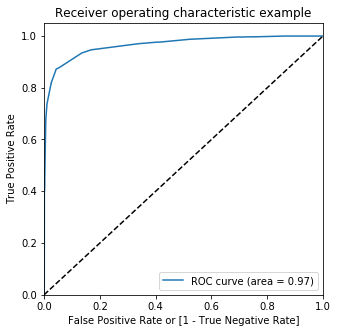

In [123]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117648,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.090522,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011598,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.554561,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999056,7987,1,1,1,1,1,1,1,1,1,1,1


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.783184  0.969338  0.666581
0.2   0.2  0.890411  0.934996  0.862484
0.3   0.3  0.919540  0.877760  0.945711
0.4   0.4  0.923949  0.872036  0.956466
0.5   0.5  0.923162  0.867539  0.958003
0.6   0.6  0.914187  0.817661  0.974648
0.7   0.7  0.914187  0.817253  0.974904
0.8   0.8  0.892300  0.736713  0.989757
0.9   0.9  0.875768  0.688471  0.993086


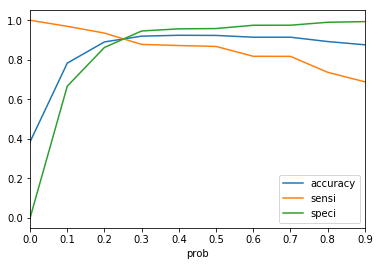

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

##### Recalculating  column 'predicted' with 1 if Convert_Prob > 0.3 else 0

In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.117648,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.090522,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011598,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.554561,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.999056,7987,1,1,1,1,1,1,1,1,1,1,1


In [128]:
y_train_pred_final=y_train_pred_final[['Converted','Convert_Prob','Prospect ID','predicted']]
y_train_pred_final.head()                                

,Converted,Convert_Prob,Prospect ID,predicted
0,0,0.117648,3009,0
1,0,0.090522,1012,0
2,0,0.011598,9226,0
3,1,0.554561,4750,1
4,1,0.999056,7987,1


#### Assigning Lead score

In [129]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,Lead_Score
0,0,0.117648,3009,0,12
1,0,0.090522,1012,0,9
2,0,0.011598,9226,0,1
3,1,0.554561,4750,1,55
4,1,0.999056,7987,1,100


In [130]:
y_train_pred_final.predicted.sum()

2359

#### Looking at the confusion matrix again

In [131]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3693,  212],
       [ 299, 2147]], dtype=int64)

### Accuracy

In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


## Metrics beyond simply accuracy

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8777596075224857

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9457106274007683

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05428937259923176


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.9101314116150911


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9251002004008017


## Precision and Recall

##### Precision
TP / TP + FP

In [139]:
precision =confusion[1,1]/(confusion[0,1]+confusion[1,1])
print(precision)

0.9101314116150911


##### Recall
TP / TP + FN

In [140]:
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(recall)

0.8777596075224857


Using sklearn utilities for the same

In [141]:
from sklearn.metrics import precision_score, recall_score

In [142]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9101314116150911

In [143]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8777596075224857

### F1- score

In [144]:
F1SCORE=2* (precision*recall)/(precision+recall)
print(F1SCORE)

0.8936524453694068


### Precision and recall tradeoff

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
        ..
 6301    1
 6302    0
 6303    1
 6304    1
 6305    1
 6306    1
 6307    0
 6308    0
 6309    0
 6310    1
 6311    1
 6312    0
 6313    0
 6314    0
 6315    1
 6316    1
 6317    1
 6318    0
 6319    0
 6320    0
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

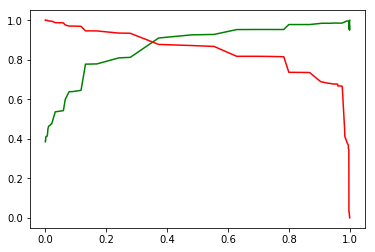

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

#### FEATURE SCALING ON TEST DATA SET

In [149]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\SHARIE R NATH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [150]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified
3271,0,0,0,1,0,0,0,0,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0
7936,0,0,0,1,0,0,0,0,0,0,0
4216,0,0,0,0,1,0,0,0,0,0,1
3830,0,0,0,1,0,0,0,0,0,0,0


In [151]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

3271    0.117648
1490    0.975750
7936    0.117648
4216    0.983423
3830    0.117648
1800    0.975750
6507    0.066735
4821    0.007434
4223    0.997345
4714    0.169642
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
# Let's see the head
y_pred_1.head()

,0
3271,0.117648
1490,0.975750
7936,0.117648
4216,0.983423
3830,0.117648


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [157]:
# Putting Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.117648
1,1,1490,0.975750
2,0,7936,0.117648
3,1,4216,0.983423
4,0,3830,0.117648


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Convert_Prob'], axis=1)

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob
0,3271,0,0.117648
1,1490,1,0.975750
2,7936,0,0.117648
3,4216,1,0.983423
4,3830,0,0.117648


In [164]:
y_pred_final['predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,predicted
0,3271,0,0.117648,0
1,1490,1,0.975750,1
2,7936,0,0.117648,0
3,4216,1,0.983423,1
4,3830,0,0.117648,0


#### Assigning Lead Score

In [166]:
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,predicted,Lead_Score
0,3271,0,0.117648,0,12
1,1490,1,0.975750,1,98
2,7936,0,0.117648,0,12
3,4216,1,0.983423,1,98
4,3830,0,0.117648,0,12


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.9129636430407638

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1635,   99],
       [ 138,  851]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8604651162790697

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9429065743944637

In [172]:
from sklearn.metrics import precision_score, recall_score

In [173]:
precision=precision_score(y_pred_final.Converted, y_pred_final.predicted)
print(precision)

0.8957894736842106


In [174]:
recall=recall_score(y_pred_final.Converted, y_pred_final.predicted)
print(recall)

0.8604651162790697


### F1-score

In [175]:
F1SCORE=2* (precision*recall)/(precision+recall)
print(F1SCORE)

0.8777720474471378


### ASSIGNING LEAD SCORE TO ORIGINAL CLEANED DATSET 

In [176]:
Converted = (sum(y_pred_final.predicted)/len(y_pred_final.predicted.index))*100
Converted

34.887991186191705

In [177]:
y_pred_final.head()


,Prospect ID,Converted,Convert_Prob,predicted,Lead_Score
0,3271,0,0.117648,0,12
1,1490,1,0.975750,1,98
2,7936,0,0.117648,0,12
3,4216,1,0.983423,1,98
4,3830,0,0.117648,0,12


In [178]:
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect ID,predicted,Lead_Score
0,0,0.117648,3009,0,12
1,0,0.090522,1012,0,9
2,0,0.011598,9226,0,1
3,1,0.554561,4750,1,55
4,1,0.999056,7987,1,100


In [179]:
final_pred_df= pd.concat((y_train_pred_final,y_pred_final), axis=0)
final_pred_df.shape

(9074, 5)

In [180]:
final_pred_df.head()

,Convert_Prob,Converted,Lead_Score,Prospect ID,predicted
0,0.117648,0,12,3009,0
1,0.090522,0,9,1012,0
2,0.011598,0,1,9226,0
3,0.554561,1,55,4750,1
4,0.999056,1,100,7987,1


In [181]:
leads_orginal['Prospect ID']=leads_orginal.index
leads_orginal.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [182]:
leads_orginal.shape

(9074, 16)

In [183]:
#Merged final data with predictions and actual bvariables
combined_df = pd.merge(leads_orginal,final_pred_df,on ='Prospect ID')
combined_df.shape

(9074, 20)

### Hot Leads Subset :-  Leads having high probability of conversion 

In [184]:
High_prob_Covert=combined_df[combined_df['Lead_Score'] >30]

In [185]:
High_prob_Covert.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Convert_Prob,Converted_y,Lead_Score,predicted
2,2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,0.975750,1,98,1
4,4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,0.868471,1,87,1
6,6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified,0.868471,1,87,1
10,10,Landing Page Submission,Organic Search,No,No,1,8.0,1351,6.00,Email Opened,Travel and Tourism,Unemployed,Will revert after reading the email,Might be,Other Metro Cities,Email Opened,0.975750,1,98,1
11,11,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Lost to EINS,Not Sure,Thane & Outskirts,Page Visited on Website,0.998554,1,100,1


### Analysis could be done on the Hot leads subset to arrive at insights for increasing conversion rate

### Have to prioritize on Hot leads(Lead Score >30) with following attributes:-

#### 1. Tags_Lost to EINS	
#### 2.	Tags_Closed by Horizzon	
#### 3.	Tags_Will revert after reading the email
#### 4.  Lead Source_Welingak Website
#### 5.  Last Activity_SMS Sent

